Kanyao Han     
MACSS 30100

# Problem Set #3

## Part I    

### a)

In [1]:
import numpy as np
import numpy.linalg as lin
import scipy.stats as sts
import scipy.integrate as intgr
import scipy.optimize as opt
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
cmap1 = matplotlib.cm.get_cmap('summer')

import warnings
warnings.filterwarnings("ignore")

incomes = np.loadtxt('incomes.txt')
%matplotlib inline

(0, 200000)

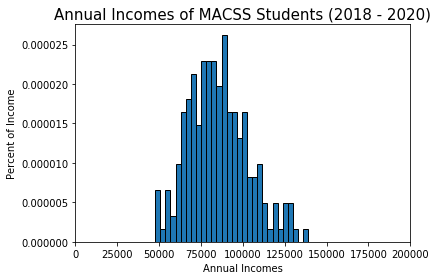

In [2]:
plt.hist(incomes, 30, edgecolor='black', normed=True)
plt.title('Annual Incomes of MACSS Students (2018 - 2020)', fontsize = 15)
plt.xlabel('Annual Incomes')
plt.ylabel("Percent of Income")
plt.xlim([0, 200000])

### b)

In [3]:
def lognorm_pdf(xvals, mu, sigma):   
    
    pdf_vals = (1/(xvals * sigma * np.sqrt(2 * np.pi)) * np.exp( - (np.log(xvals) - mu)**2 / (2 * sigma ** 2)))
    
    return pdf_vals


def data_moments(xvals):
    mean_data = xvals.mean()
    std_data = xvals.std()
    
    return mean_data, std_data


def model_moments(mu, sigma):
    xfx = lambda x: x * lognorm_pdf(x, mu, sigma)
    (mean_model, m_m_err) = intgr.quad(xfx, 1e-10, 1000000)
    x2fx = lambda x: ((x - mean_model) ** 2) * lognorm_pdf(x, mu, sigma) 
    (var_model, v_m_err) = intgr.quad(x2fx, 1e-10, 1500000)
    
    std_model = np.sqrt(var_model)
    
    return mean_model, std_model


def err_vec(xvals, mu, sigma, simple):
    mean_data, std_data = data_moments(xvals)
    moms_data = np.array([[mean_data], [std_data]])
    mean_model, std_model = model_moments(mu, sigma)
    moms_model = np.array([[mean_model], [std_model]])
    if simple:
        err_vec = moms_model - moms_data
    else:
        err_vec = (moms_model - moms_data) / moms_data
    
    return err_vec


def criterion(params, *args):
    mu, sigma = params
    xvals, W = args
    err = err_vec(xvals, mu, sigma, simple=False)
    crit_val = np.dot(np.dot(err.T, W), err) 
    
    return crit_val

In [4]:
mu_init = 11.33
sig_init = 0.2

params_init = np.array([mu_init, sig_init])
W_hat = np.eye(2)
gmm_args = (incomes, W_hat)
results = opt.minimize(criterion, params_init, args=(gmm_args),
                       method='L-BFGS-B', bounds=((1e-10, None), (1e-10, None)))
mu_GMM1, sig_GMM1 = results.x
GMM1_Value = results.fun[0][0]

print('mu_GMM1=', mu_GMM1, ' sig_GMM1=', sig_GMM1, "criterion value=", GMM1_Value)

mu_GMM1= 11.331782880323757  sig_GMM1= 0.2087174308851683 criterion value= 8.83062237234611e-09


In [5]:
mean_data, std_data = data_moments(incomes)
mean_model, std_model = model_moments(mu_GMM1, sig_GMM1)
err1 = err_vec(incomes, mu_GMM1, sig_GMM1, False).reshape(2,)
print('Data Moments Mean =', mean_data, ', Data Moments Std =', std_data)
print('Model Moments Mean =', mean_model, ', Model Moments Std =', std_model)

Data Moments Mean = 85276.82360625811 , Data Moments Std = 17992.542128046523
Model Moments Mean = 85268.83961667001 , Model Moments Std = 17992.68729806285


Data Moments and Model Moments are similar but have silight differences.

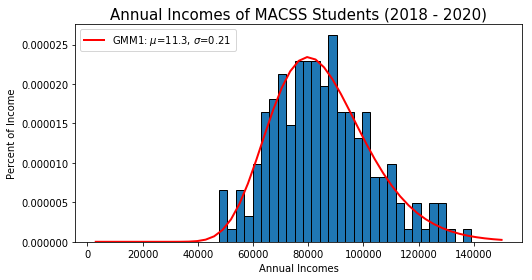

In [6]:
dist_incomes = np.linspace(0, 150000)
plt.figure(figsize=(8,4))
plt.hist(incomes, 30, edgecolor='black', normed=True)
plt.title('Annual Incomes of MACSS Students (2018 - 2020)', fontsize = 15)
plt.xlabel('Annual Incomes')
plt.ylabel("Percent of Income")
plt.plot(dist_incomes, lognorm_pdf(dist_incomes, mu_GMM1, sig_GMM1),
         linewidth=2, color='r', label='GMM1: $\mu$=11.3, $\sigma$=0.21')
plt.legend(loc='upper left')

### c)

In [7]:
err1 = err_vec(incomes, mu_GMM1, sig_GMM1, False)
VCV2 = np.dot(err1, err1.T) / incomes.shape[0]
W_hat2 = lin.pinv(VCV2)
print(W_hat2, "is the variance covariance matirx")

[[ 2.24814988e+10 -1.93740632e+09]
 [-1.93740632e+09  1.66961433e+08]] is the variance covariance matirx


In [8]:
mu_init = mu_GMM1
sig_init = sig_GMM1
params_init = np.array([mu_GMM1, sig_GMM1])
gmm_args = (incomes, W_hat2)
results2 = opt.minimize(criterion, params_init, args=(gmm_args),
                       method='L-BFGS-B', bounds=((1e-10, None), (1e-10, None)))
mu_GMM2, sig_GMM2 = results2.x
GMM2_Value = results2.fun[0][0]
print('mu_GMM2=', mu_GMM2, ' sig_GMM2=', sig_GMM2, "criterion value=", GMM2_Value)


mu_GMM2= 11.331886095118325  sig_GMM2= 0.20871742938931642 criterion value= 4.046868860367288e-07


In [9]:
mean_data, std_data = data_moments(incomes)
mean_model, std_model = model_moments(mu_GMM2, sig_GMM2)
print('Data Moments Mean = =', mean_data, ', Data Moments Std =', std_data)
print('Model Moments Mean = =', mean_model, ', Model Moments Std =', std_model)

Data Moments Mean = = 85276.82360625811 , Data Moments Std = 17992.542128046523
Model Moments Mean = = 85277.64105002208 , Model Moments Std = 17994.544368017836


Data Moments and Model Moments are similar but have silight differences.

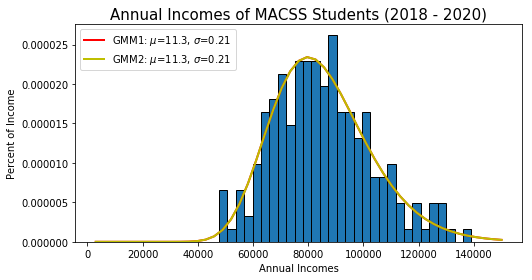

In [10]:
plt.figure(figsize=(8,4))
plt.hist(incomes, 30, edgecolor='black', normed=True)
plt.title('Annual Incomes of MACSS Students (2018 - 2020)', fontsize = 15)
plt.xlabel('Annual Incomes')
plt.ylabel("Percent of Income")
plt.plot(dist_incomes, lognorm_pdf(dist_incomes, mu_GMM1, sig_GMM1),
         linewidth=2, color='r', label='GMM1: $\mu$=11.3, $\sigma$=0.21')
plt.plot(dist_incomes, lognorm_pdf(dist_incomes, mu_GMM2, sig_GMM2),
         linewidth=2, color='y', label='GMM2: $\mu$=11.3, $\sigma$=0.21')
plt.legend(loc='upper left')

### d)

In [11]:
def data_moments3(xvals):
    bpct_1_dat = xvals[xvals < 75000].shape[0] / xvals.shape[0]
    bpct_2_dat = (xvals[(xvals >= 75000) & (xvals < 100000)].shape[0] /
                  xvals.shape[0])
    bpct_3_dat = (xvals[(xvals >= 100000)].shape[0] / xvals.shape[0])

    return bpct_1_dat, bpct_2_dat, bpct_3_dat



def model_moments3(mu, sigma):
    xfx = lambda x: sts.lognorm.pdf(x, scale = np.exp(mu), s=sigma)
    (bpct_1_mod, bp_1_err) = intgr.quad(xfx, 0, 75000)
    (bpct_2_mod, bp_2_err) = intgr.quad(xfx, 75000, 100000)
    (bpct_3_mod, bp_3_err) = intgr.quad(xfx, 100000, np.inf)
    
    return bpct_1_mod, bpct_2_mod, bpct_3_mod

def err_vec3(xvals, mu, sigma):
    bpct_1_dat, bpct_2_dat, bpct_3_dat = data_moments3(xvals)
    moms_data = np.array([[bpct_1_dat], [bpct_2_dat], [bpct_3_dat]])
    bpct_1_mod, bpct_2_mod, bpct_3_mod = model_moments3(mu, sigma)
    moms_model = np.array([[bpct_1_mod], [bpct_2_mod], [bpct_3_mod]])
    err_vec = (moms_model - moms_data) / moms_data
    
    return err_vec

def criterion3(params, *args):
    mu, sigma = params
    xvals, W = args
    err = err_vec3(xvals, mu, sigma)
    crit_val = np.dot(np.dot(err.T, W), err) 
    
    return crit_val

In [12]:
mu_init = 11.33
sig_init = 0.2
W_hat = np.eye(3)
gmm_args = (incomes, W_hat)
results3 = opt.minimize(criterion3, params_init, args=(gmm_args),
                       method='L-BFGS-B', bounds=((1e-10, None), (1e-10, None)))
mu_GMM3, sig_GMM3 = results3.x
print('mu_GMM3=', mu_GMM3, ' sig_GMM3=', sig_GMM3, ' criterion function value=', results3.fun[0][0])

perc_1_data, perc_2_data, perc_3_data = data_moments3(incomes)
perc_1_model, perc_2_model, perc_3_model = model_moments3(mu_GMM3, sig_GMM3)
err3 = err_vec3(incomes, mu_GMM3, sig_GMM3).reshape(3,)
print('Data Moments: 0 - 75000:', perc_1_data, ', 75000 - 100000:', perc_2_data, ',more than 100000:', perc_3_data)
print('Model Moments: 0 - 75000:', perc_1_model, ', 75000 - 100000:', perc_2_model, ',more than 100000:', perc_3_model)

mu_GMM3= 11.335681327337394  sig_GMM3= 0.21059845399271948  criterion function value= 2.4523654553000828e-15
Data Moments: 0 - 75000: 0.3 , 75000 - 100000: 0.5 ,more than 100000: 0.2
Model Moments: 0 - 75000: 0.3000000040124561 , 75000 - 100000: 0.5000000052863539 ,more than 100000: 0.1999999907011902


Data Moments and Model Moments are similar but have silight differences.

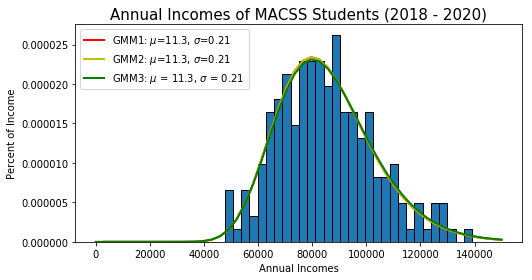

In [13]:
plt.figure(figsize=(8,4))
plt.figure(figsize=(8,4)) 
plt.hist(incomes, 30, edgecolor='black', normed=True)
plt.title('Annual Incomes of MACSS Students (2018 - 2020)', fontsize = 15)
plt.xlabel('Annual Incomes')
plt.ylabel("Percent of Income")
plt.plot(dist_incomes, lognorm_pdf(dist_incomes, mu_GMM1, sig_GMM1),
         linewidth=2, color='r', label='GMM1: $\mu$=11.3, $\sigma$=0.21')
plt.plot(dist_incomes, lognorm_pdf(dist_incomes, mu_GMM2, sig_GMM2),
         linewidth=2, color='y', label='GMM2: $\mu$=11.3, $\sigma$=0.21')
plt.legend(loc='upper left')
pdf_vals_3 = sts.lognorm.pdf(dist_incomes, s = sig_GMM3, scale = np.exp(mu_GMM3))
plt.plot(dist_incomes, pdf_vals_3,
         linewidth=2, color='g', label='GMM3: $\mu$ = 11.3, $\sigma$ = 0.21')
plt.legend(loc='upper left')

### e)

In [14]:
err3 = err_vec3(incomes, mu_GMM3, sig_GMM3).reshape(3, 1)
VCV3 = np.dot(err3, err3.T)/ incomes.shape[0]
W_hat3 = lin.pinv(VCV3)

mu_init = mu_GMM3
sig_init = sig_GMM3
params_init = np.array([mu_init, sig_init])
gmm_args = (incomes, W_hat3)
results4 = opt.minimize(criterion3, params_init, args=(gmm_args),
                       method='L-BFGS-B', bounds=((1e-10, None), (1e-10, None)))
mu_GMM4, sig_GMM4 = results4.x
perc_1_data, perc_2_data, perc_3_data = data_moments3(incomes)
perc_1_model, perc_2_model, perc_3_model = model_moments3(mu_GMM4, sig_GMM4)

print('mu_GMM4=', mu_GMM4, ' sig_GMM4=', sig_GMM4, ' criterion function value=', results4.fun[0][0])
print('Data Moments: 0 - 75000:', perc_1_data, ', 75000 - 100000:', perc_2_data, ',more than 100000:', perc_3_data)
print('Model Moments: 0 - 75000:', perc_1_model, ', 75000 - 100000:', perc_2_model, ',more than 100000:', perc_3_model)
print(W_hat3, "is the variance covariance matirx")

mu_GMM4= 11.335681226022524  sig_GMM4= 0.21059860772792785  criterion function value= 0.025760593301074053
Data Moments: 0 - 75000: 0.3 , 75000 - 100000: 0.5 ,more than 100000: 0.2
Model Moments: 0 - 75000: 0.3000003043801347 , 75000 - 100000: 0.49999966760087106 ,more than 100000: 0.20000002801899452
[[ 5.94891402e+15  4.70256584e+15 -2.06797852e+16]
 [ 4.70256584e+15  3.71733822e+15 -1.63471940e+16]
 [-2.06797852e+16 -1.63471940e+16  7.18876612e+16]] is the variance covariance matirx


Data Moments and Model Moments are similar but have silight differences.

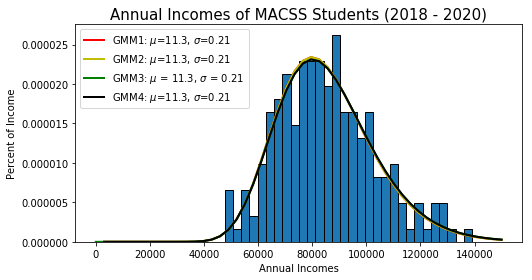

In [15]:
plt.figure(figsize=(8,4))
plt.hist(incomes, 30, edgecolor='black', normed=True)
plt.title('Annual Incomes of MACSS Students (2018 - 2020)', fontsize = 15)
plt.xlabel('Annual Incomes')
plt.ylabel("Percent of Income")
plt.plot(dist_incomes, lognorm_pdf(dist_incomes, mu_GMM1, sig_GMM1),
         linewidth=2, color='r', label='GMM1: $\mu$=11.3, $\sigma$=0.21')
plt.plot(dist_incomes, lognorm_pdf(dist_incomes, mu_GMM2, sig_GMM2),
         linewidth=2, color='y', label='GMM2: $\mu$=11.3, $\sigma$=0.21')
plt.legend(loc='upper left')
pdf_vals_3 = sts.lognorm.pdf(dist_incomes, s = sig_GMM3, scale = np.exp(mu_GMM3))
plt.plot(dist_incomes, pdf_vals_3,
         linewidth=2, color='g', label='GMM3: $\mu$ = 11.3, $\sigma$ = 0.21')
plt.plot(dist_incomes, lognorm_pdf(dist_incomes, mu_GMM4, sig_GMM4),
         linewidth=2, color='k', label='GMM4: $\mu$=11.3, $\sigma$=0.21')
plt.legend(loc='upper left')

### f)

I think part (d), which is GMM3, fits the data best. This is because it has the lowest criterion function value, although the parameters in four methods are similar.

## Part II

In [16]:
import pandas as pd
data = pd.read_csv('sick.txt', encoding = 'utf-8-sig')

In [17]:
def err_ols(data, *params):
    b0, b1, b2, b3 = params
    err_vec = data.sick - (b0 + b1 * data.age + b2 * data.children + b3 * data.avgtemp_winter)
    return (err_vec)

def crit_ols(params, args):
    data = args
    W = np.eye(len(data))
    err = err_ols(data, *params)
    crit_val = np.dot(np.dot(err.T, W), err)
    return (crit_val)

In [18]:
params_init = np.array([0, 0, 0, 0])
results = opt.minimize(crit_ols,  params_init, args=data, method = 'L-BFGS-B')
b0, b1, b2, b3 = results.x
print('b0 =', b0)
print('b1 =', b1)
print('b2 =', b2)
print('b3 =', b3)
print('Criterion function value:', crit_ols(np.array([b0, b1, b2, b3]), data) )

b0 = 0.2516455380120787
b1 = 0.012933544008704194
b2 = 0.40050037161112734
b3 = -0.009991768674647367
Criterion function value: 0.001821289815662086
